In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_excel('../product_performance_blstm\dataset_new.xlsx',sheet_name='train')
data

,KodeBarang,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,cluster
0,04121,7,9,6,9,40,0,3,0,7,...,67,77,11,57,43,50,37,21,136,0
1,18031,230,227,279,153,190,256,267,305,238,...,336,153,103,221,360,280,240,120,548,1
2,04161,102,50,45,41,71,11,52,14,66,...,21,20,7,33,21,28,30,10,18,0
3,04162,272,155,214,226,268,110,204,253,193,...,102,118,120,211,292,105,108,101,117,1
4,04163,28,28,29,52,44,21,47,15,24,...,18,23,22,16,22,31,36,17,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,04157,55,64,44,61,30,1,24,37,67,...,20,10,300,34,7,7,6,4,21,0
102,18104,46,295,83,112,70,40,18,140,97,...,47,54,27,15,57,132,66,34,146,0
103,18106,200,204,0,2,10,7,0,27,74,...,15,136,15,15,14,131,84,12,14,0
104,18092,297,418,329,70,498,59,298,376,259,...,450,498,254,260,336,493,438,408,322,1


In [3]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [4]:
#now lets take clusters
c0 = data.query("cluster == 0")
print("Jumlah Produk:")
print(c0['KodeBarang'].size)
c1 = data.query("cluster == 1")
print("Jumlah Produk:")
print(c1['KodeBarang'].size)
c2 = data.query("cluster == 2")
print("Jumlah Produk:")
print(c2['KodeBarang'].size)
c3 = data.query("cluster == 3")
print("Jumlah Produk:")
print(c3['KodeBarang'].size)

Jumlah Produk:
70
Jumlah Produk:
31
Jumlah Produk:
4
Jumlah Produk:
1


In [5]:
#oke ada ternyata yang cuman sendirian (1 product di cluster tersebut), kita beresin dia dulu, the easiest, dan biar keliatan kita
#ngapain aja di time series ini
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)
# ini fungsinya buat nge ubah dataset jadi windowed

In [6]:
col = c2.KodeBarang.values
col

array(['18004', '18063', '04105', '18111'], dtype=object)

In [7]:
#next kita ubah bentuk data nya dari yang tadinya kesamping jadi ke bawah, tapi pertama mau aku drop dulu cluster sama kode produknya
c2=c2.drop(columns=['KodeBarang','cluster'])
c2

,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
17,5307,3231,4562,372,4159,1853,6741,2884,5721,2573,...,2184,3210,2794,1243,2619,3888,1659,1971,2877,2138
30,3027,2097,6983,1318,2965,840,3094,1826,3463,5040,...,792,620,1265,910,713,867,630,860,758,747
48,2934,1481,1946,2130,2152,1563,1975,2426,1844,1944,...,1717,1858,1922,1731,2472,1846,2291,2199,1849,2180
82,0,33,2,0,3,27,23,9,7,-2,...,5597,2573,5687,5273,3236,8910,4665,7150,6726,5124


In [9]:
c2.set_index(col,inplace=True)

In [14]:
data_18004 = c2.iloc[[0]]
c2_t = c2.T
data_18004 = data_18004.T
data_18004

,18004
1,5307
2,3231
3,4562
4,372
5,4159
6,1853
7,6741
8,2884
9,5721
10,2573


In [17]:
series

array([nan])

In [19]:
from statsmodels.tsa.stattools import adfuller
def cek_stationary(sales):
    result = adfuller(sales)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('lags-used: {}'.format(result[2]))
    print('number of Observations: {}'.format(result[3]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

cek_stationary(data_18004['18004'])

ADF Statistic: -9.823857265365813
p-value: 5.2508113129240333e-17
lags-used: 0
number of Observations: 53
Critical Values:
	1%: -3.560242358792829
	5%: -2.9178502070837
	10%: -2.5967964150943397


H0 = data stasioner

H1 = data tidak stasioner

p < 0.05 = maka H0 diterima
p > 0.05 = maka H1 diterima

dikarenakan data sudah stasioner, maka data tidak perlu dilakukan difresiansi

Penentuan parsial correlation dan auto correlation

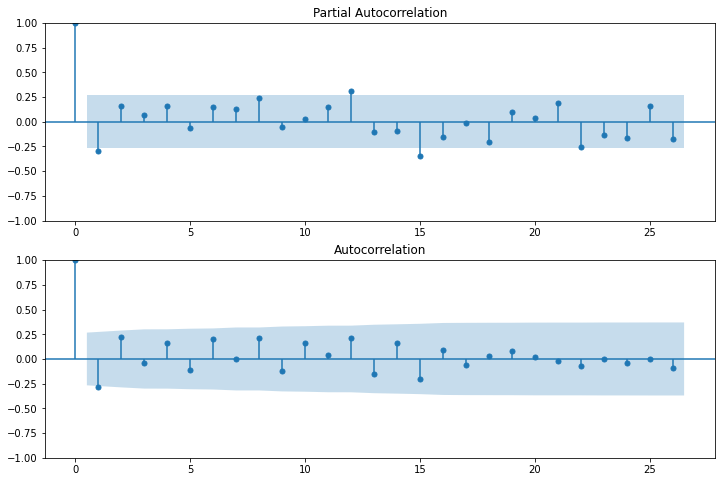

In [22]:
# Menentukan nilai AR (PACF) dan MA (ACF)
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(data_18004['18004'].dropna(), lags=26, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(data_18004['18004'].dropna(), lags=26,ax=ax2)

In [27]:
# from statsmodels.tsa.arima_model import ARIMA
model = sm.tsa.arima.ARIMA(data_18004['18004'], order=(1,0,1))  #(p,d,q)
#order ada 3 parameter, yaitu p, d, q
#p = lihat di partial auto correlation, d = berapa kali kita melakukan differensiasi, q = lihat di  auto correlation
model_fit = model.fit() #disp = 0 untuk tidak menampilkan hasilnya
model_fit.summary()


C:\Users\Alvin Buana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
C:\Users\Alvin Buana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
C:\Users\Alvin Buana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  18004   No. Observations:                   54
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -468.351
Date:                Sat, 26 Feb 2022   AIC                            944.701
Time:                        21:51:30   BIC                            952.657
Sample:                    01-01-1970   HQIC                           947.769
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2909.8803    189.022     15.394      0.000    2539.404    3280.356
ar.L1         -0.9698      0.038    -25.765      0.000      -1.044      -0.896
ma.L1          0.8592      0.107      7.996      0.000       0.649       1.070
sigma2      1.972e+06   4.98e+05      3.959      0.000    9.95e+05    2.95e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):                 2.03
Prob(Q):                              0.53   Prob(JB):                         0.36
Heteroskedasticity (H):               0.34   Skew:                             0.32
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- ar = 

Lihat P>|z| ma.L1 dan ma.L2.
Setelah itu kita uji hipotesis ma.L1 dan ma.L2
kita uji dengan nilai alpha dimana :
- H0 = tidak significant 

- H1 = significant
 
jika P>|z| <0.05 = H1 diterima, model bisa digunakan untuk prediksi

jika P>|z| >0.05 = H0 diterima, model tidak bisa digunakan untuk prediksi

In [91]:
result = model_fit.predict(1, len(data_18004) , dynamic=False)
# plt.show()
result

1970-01-01 00:00:00.000000002    2293.816281
1970-01-01 00:00:00.000000003    3313.706304
1970-01-01 00:00:00.000000004    2298.486689
1970-01-01 00:00:00.000000005    3803.990989
1970-01-01 00:00:00.000000006    1991.997678
1970-01-01 00:00:00.000000007    3818.634110
1970-01-01 00:00:00.000000008    1656.051753
1970-01-01 00:00:00.000000009    3974.919636
1970-01-01 00:00:00.000000010    1668.259011
1970-01-01 00:00:00.000000011    4007.966128
1970-01-01 00:00:00.000000012    2017.300238
1970-01-01 00:00:00.000000013    3636.265364
1970-01-01 00:00:00.000000014    1885.346626
1970-01-01 00:00:00.000000015    4050.090055
1970-01-01 00:00:00.000000016    1758.446149
1970-01-01 00:00:00.000000017    3749.592878
1970-01-01 00:00:00.000000018    2319.116899
1970-01-01 00:00:00.000000019    3305.168077
1970-01-01 00:00:00.000000020    2241.708510
1970-01-01 00:00:00.000000021    3700.107401
1970-01-01 00:00:00.000000022    2134.574669
1970-01-01 00:00:00.000000023    3841.686750
1970-01-01

In [92]:
result_plot = pd.DataFrame(result.values)

In [103]:
data_18004.reset_index(drop=True,inplace=True)
data_18004


,18004
0,5307
1,3231
2,4562
3,372
4,4159
5,1853
6,6741
7,2884
8,5721
9,2573


In [106]:
result_plot.reset_index(drop=True,inplace=True)

In [109]:
result_1 = pd.concat([result_plot, data_18004], ignore_index=True, sort=False,axis=1)

In [114]:
# result_1['difference'] = result_1['0'] - result_1['1'].shift(1)
# result_1.columns = ['prediction','18004']
result_1['difference'] = round((result_1['prediction'] - result_1['18004']),2)
result_1

,prediction,18004,difference
0,2293.816281,5307,-3013.18
1,3313.706304,3231,82.71
2,2298.486689,4562,-2263.51
3,3803.990989,372,3431.99
4,1991.997678,4159,-2167.00
5,3818.634110,1853,1965.63
6,1656.051753,6741,-5084.95
7,3974.919636,2884,1090.92
8,1668.259011,5721,-4052.74
9,4007.966128,2573,1434.97


[]

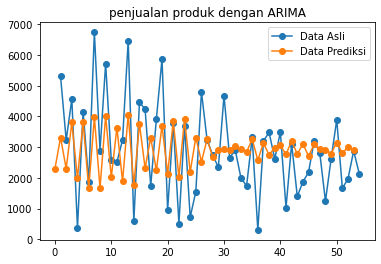

In [70]:
plt.plot(data_18004,marker = 'o',label = 'Data Asli')
plt.plot(result_plot,marker='o',label = 'Data Prediksi')
plt.title('penjualan produk dengan ARIMA')
plt.legend()
plt.plot()
